In [3]:
import numpy as np 
import pandas as pd 
import os 

In [23]:
# Load sales data
dataset_path  = "/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/"

#sales_data = pd.read_csv('sales_train.csv')
sales_data = pd.read_csv (os.path.join(dataset_path, "sales_train_validation.csv"))
# The sell_prices.csv file is not needed for extracting static features
# but can be used for other purposes such as price analysis

sales_data


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [25]:
# Extract static features directly
static_features = sales_data[['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].copy()
static_features

,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA
...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI


In [26]:
# Calculate mean sales for each item
# Exclude the first six columns as they are identifiers and not sales data
mean_sales = sales_data.iloc[:, 6:].mean(axis=1)
static_features['mean_sales'] = mean_sales


In [27]:
# Display the first few rows to verify
static_features


,item_id,dept_id,cat_id,store_id,state_id,mean_sales
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.313643
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.257710
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.150549
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1.718766
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.966545
...,...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0.534239
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0.376372
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0.894929
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0.366963


In [28]:
static_features.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for column in ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']:
    encoders[column] = LabelEncoder()
    static_features[column] = encoders[column].fit_transform(static_features[column])

static_features

,item_id,dept_id,cat_id,store_id,state_id,mean_sales
0,1437,3,1,0,0,0.313643
1,1438,3,1,0,0,0.257710
2,1439,3,1,0,0,0.150549
3,1440,3,1,0,0,1.718766
4,1441,3,1,0,0,0.966545
...,...,...,...,...,...,...
30485,1432,2,0,9,2,0.534239
30486,1433,2,0,9,2,0.376372
30487,1434,2,0,9,2,0.894929
30488,1435,2,0,9,2,0.366963


In [33]:
static_features

,item_id,dept_id,cat_id,store_id,state_id,mean_sales
0,1437,3,1,0,0,0.313643
1,1438,3,1,0,0,0.257710
2,1439,3,1,0,0,0.150549
3,1440,3,1,0,0,1.718766
4,1441,3,1,0,0,0.966545
...,...,...,...,...,...,...
30485,1432,2,0,9,2,0.534239
30486,1433,2,0,9,2,0.376372
30487,1434,2,0,9,2,0.894929
30488,1435,2,0,9,2,0.366963


In [37]:
np.save("M5_static.npy", static_features.to_numpy())


In [39]:
np.load('M5_static.npy')

array([[1.43700000e+03, 3.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.13643492e-01],
       [1.43800000e+03, 3.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.57710403e-01],
       [1.43900000e+03, 3.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.50548876e-01],
       ...,
       [1.43400000e+03, 2.00000000e+00, 0.00000000e+00, 9.00000000e+00,
        2.00000000e+00, 8.94929430e-01],
       [1.43500000e+03, 2.00000000e+00, 0.00000000e+00, 9.00000000e+00,
        2.00000000e+00, 3.66962886e-01],
       [1.43600000e+03, 2.00000000e+00, 0.00000000e+00, 9.00000000e+00,
        2.00000000e+00, 6.94720335e-01]])

In [52]:
df_cal = pd.read_csv("../../../JupyterNotebooks/Comparison_Multivariate/dataset/M5/calendar.csv")


In [56]:
df_cal[:1913]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0
1909,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0
1910,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0
1911,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0


In [4]:
dataset_path  = "/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/"

#sales_data = pd.read_csv('sales_train.csv')
sales_data = pd.read_csv (os.path.join(dataset_path, "sales_train_validation.csv"))
# The sell_prices.csv file is not needed for extracting static features
# but can be used for other purposes such as price analysis



In [5]:
sales_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [6]:
df_sales = pd.concat([sales_data.iloc[:,:1], sales_data.iloc[:,6:]], axis=1)
df_sales = df_sales.set_index(["id"]).T.reset_index().drop(columns=["index"])

In [13]:

df_sales = df_sales.rename_axis("date",axis=0).rename_axis("",axis=1).iloc[:,:200]

In [14]:
df_sales.to_csv("/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/sales_columns.csv")

In [16]:
!cat /Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/M5/sales_columns.csv 

date,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,HOBBIES_1_026_CA_1_validation,HOBBIES_1_027_CA_1_validation,HOBBIES_1_028_CA_1_validation,HOBBIES_1_029_CA_1_validation,HOBBIES_1_030_CA_1_validation,HOBBIES_1_031_CA_1_validation,HOBBIES_1_032_CA_1_validation,HOBBIES_1_033_CA_1_validation,HOBBI

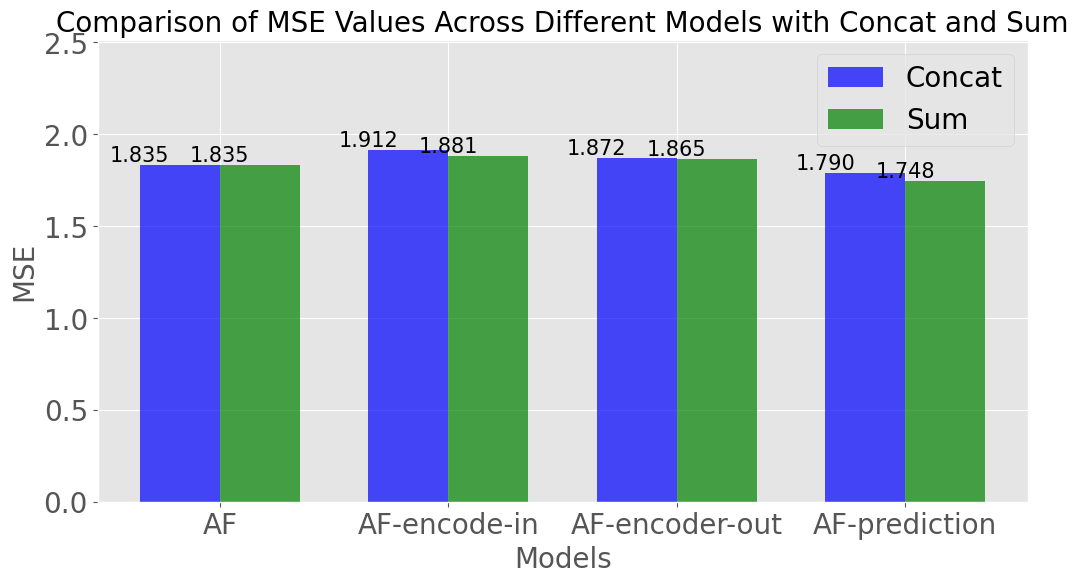

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AF', 'AF-encode-in', 'AF-encoder-out', 'AF-prediction']
mse_values_concat = [1.8350, 1.912, 1.872, 1.7899]  # For concat
mse_values_sum = [1.8350, 1.881, 1.865, 1.748]  # For sum

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='Concat', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='Sum', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with Concat and Sum', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20)  # Increased font size for legend
plt.ylim(0, max_mse * 1.35)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

plt.show()


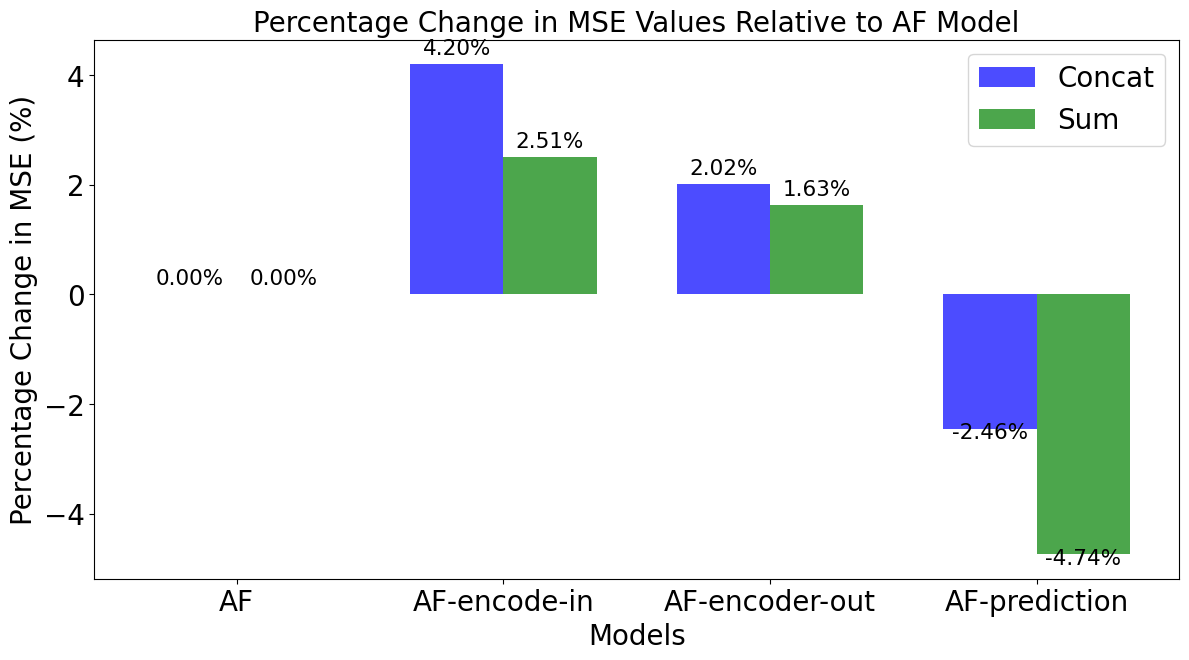

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AF', 'AF-encode-in', 'AF-encoder-out', 'AF-prediction']
mse_values_concat = [1.8350, 1.912, 1.872, 1.7899]  # For concat
mse_values_sum = [1.8350, 1.881, 1.865, 1.748]  # For sum

# Calculating % change w.r.t 'AF' for each model
percent_change_concat = [(val - mse_values_concat[0]) / mse_values_concat[0] * 100 for val in mse_values_concat]
percent_change_sum = [(val - mse_values_sum[0]) / mse_values_sum[0] * 100 for val in mse_values_sum]

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(14, 7))

# Plotting both sets of data
bars1 = plt.bar(index, percent_change_concat, bar_width, label='Concat', color='blue', alpha=0.7)
bars2 = plt.bar(index + bar_width, percent_change_sum, bar_width, label='Sum', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # 1.5x size
plt.ylabel('Percentage Change in MSE (%)', fontsize=20)  # 1.5x size
plt.title('Percentage Change in MSE Values Relative to AF Model', fontsize=20.)  # 1.5x size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # 1.5x size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels

plt.legend(fontsize=20)  # 1.5x size for legend

# Adding value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        # Adjusting label position based on bar height
        if height > 1:
            label_position = height + 0.1
        elif height < -1:
            label_position = height - 0.25
        else:
            label_position = height + 0.1  # Minor adjustment for values close to zero
        plt.text(bar.get_x() + bar.get_width() / 2, label_position, f'{height:.2f}%', ha='center', va='bottom', fontsize=15.5)  # 1.5x size for text

add_value_labels(bars1)
add_value_labels(bars2)

plt.show()


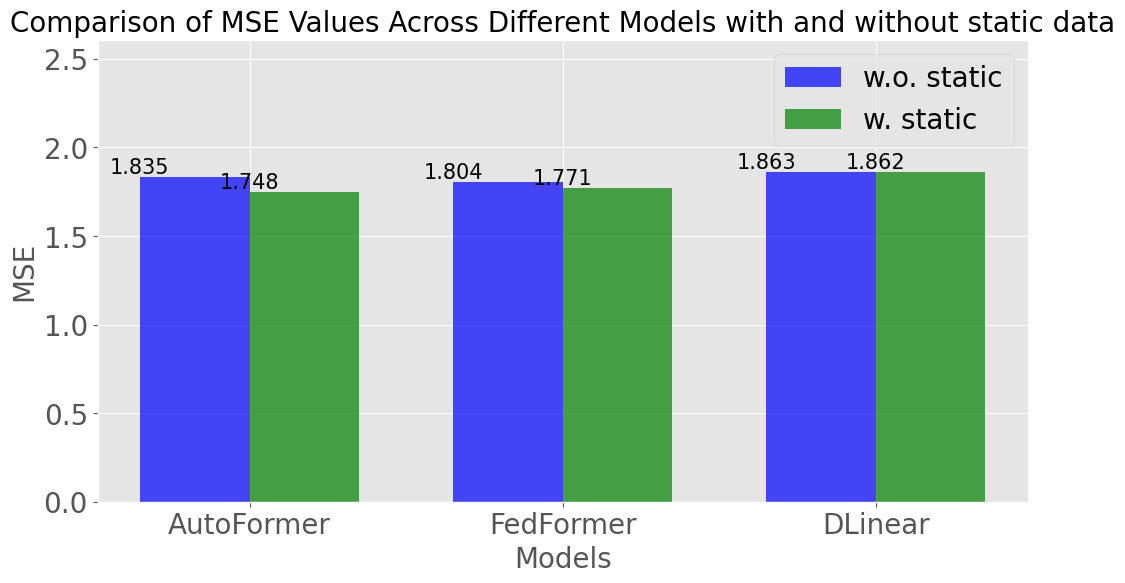

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AutoFormer', 'FedFormer', 'DLinear']
mse_values_concat = [1.8350,1.804, 1.8630]  # without static
mse_values_sum = [1.748,1.771, 1.8617 ]  # with static 

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='w.o. static', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='w. static', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with and without static data', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20)  # Increased font size for legend
plt.ylim(0, max_mse * 1.40)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

plt.show()


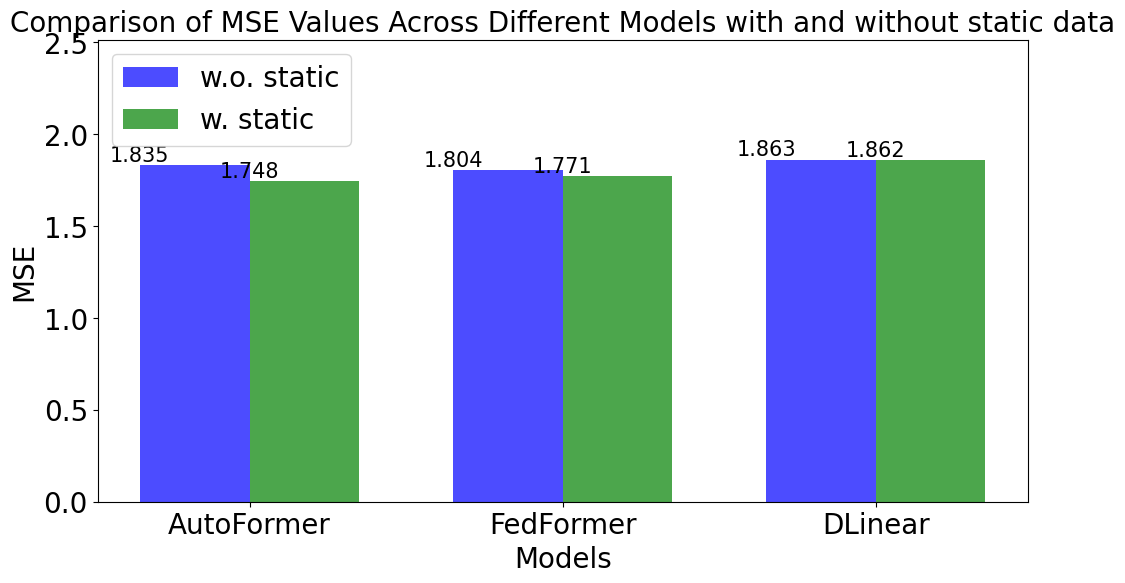

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AutoFormer', 'FedFormer', 'DLinear']
mse_values_concat = [1.8350, 1.804, 1.8630]  # without static
mse_values_sum = [1.748, 1.771, 1.8617]  # with static

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='w.o. static', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='w. static', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with and without static data', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20, loc='upper left')  # Increased font size for legend and move to upper left

# Adjust Y axis limit to have 20% more space at the top
max_mse = max(max(mse_values_concat), max(mse_values_sum))
plt.ylim(0, max_mse * 1.35)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

plt.show()


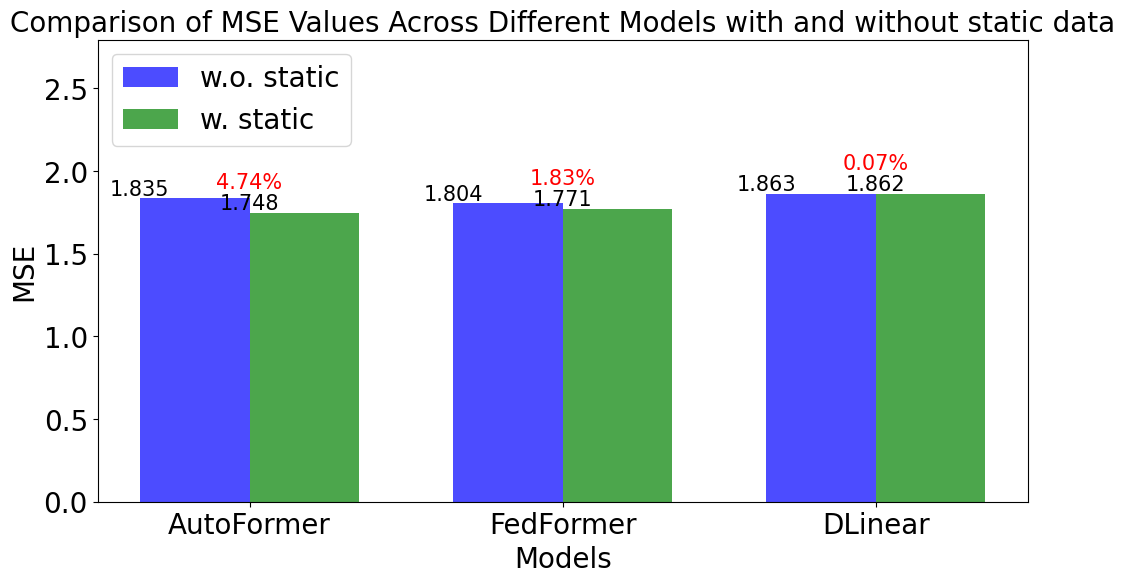

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data for models and their MSE values
models = ['AutoFormer', 'FedFormer', 'DLinear']

mse_values_concat = [1.8350, 1.804, 1.8630]  # without static
mse_values_sum = [1.748, 1.771, 1.8617]  # with static

# Calculate percentage change between without and with static
percent_change = [(1 - (sum_val / concat_val)) * 100 for concat_val, sum_val in zip(mse_values_concat, mse_values_sum)]

# Creating a bar chart
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # The label locations

plt.figure(figsize=(12, 6))

# Plotting both sets of data
plt.bar(index, mse_values_concat, bar_width, label='w.o. static', color='blue', alpha=0.7)
plt.bar(index + bar_width, mse_values_sum, bar_width, label='w. static', color='green', alpha=0.7)

# Adding labels and title with increased font size
plt.xlabel('Models', fontsize=20)  # Increased font size
plt.ylabel('MSE', fontsize=20)  # Increased font size
plt.title('Comparison of MSE Values Across Different Models with and without static data', fontsize=20)  # Increased font size
plt.xticks(index + bar_width / 2, models, fontsize=20)  # Increased font size for ticks
plt.yticks(fontsize=20)  # Set the font size for Y-axis tick labels
plt.legend(fontsize=20, loc='upper left')  # Increased font size for legend and move to upper left

# Adjust Y axis limit to have 20% more space at the top
max_mse = max(max(mse_values_concat), max(mse_values_sum))
plt.ylim(0, max_mse * 1.5)  # 1.2x the max value for additional space

# Adding value labels on bars for better clarity with increased font size
for i in range(len(models)):
    plt.text(i - bar_width/2, mse_values_concat[i] + 0.02, f'{mse_values_concat[i]:.3f}', ha='center', fontsize=15)
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.02, f'{mse_values_sum[i]:.3f}', ha='center', fontsize=15)

# Adding percentage change labels
for i, change in enumerate(percent_change):
    plt.text(i + bar_width/2, mse_values_sum[i] + 0.15, f'{change:.2f}%', ha='center', fontsize=15, color='red')

plt.show()


# Results stability as a function os seed 

In [ ]:

seed = [2021, 1, 153, 299]

2021: mse:1.7400315999984741, mae:0.8701665997505188
1: mse:1.742687463760376, mae:0.8712804913520813
153: mse:1.7733334302902222, mae:0.8850394487380981
299: mse:1.7543696165084839, mae:0.8713865280151367


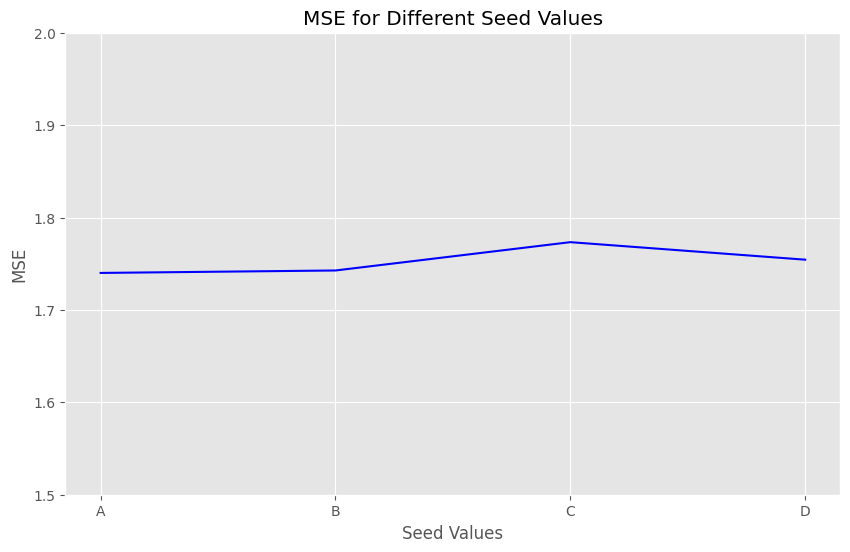

In [87]:
import matplotlib.pyplot as plt

# Seed values and corresponding MSE values
seed = ["A", "B", "C", "D"]
mse_values = [1.7400315999984741, 1.742687463760376, 1.7733334302902222, 1.7543696165084839]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.plot(seed, mse_values, color='blue')
plt.xlabel('Seed Values')
plt.ylabel('MSE')
plt.title('MSE for Different Seed Values')
plt.xticks(seed)  # Setting x-ticks to seed values for clarity
plt.ylim(1.5, 2)  # Setting y-axis limits to min 0.5 and max 2
plt.grid(True)
plt.show()


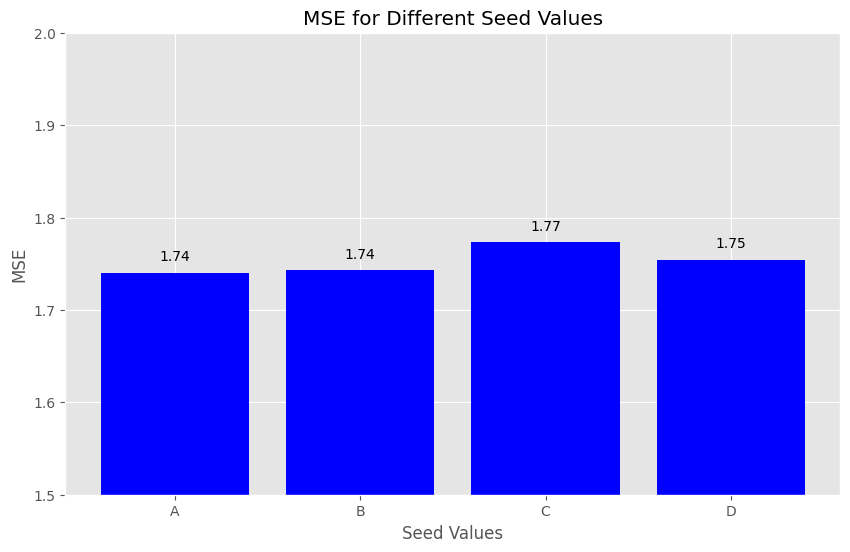

In [106]:
import matplotlib.pyplot as plt

# Seed values and corresponding MSE values
seed = ["A", "B", "C", "D"]
mse_values = [1.7400315999984741, 1.742687463760376, 1.7733334302902222, 1.7543696165084839]

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(seed, mse_values, color='blue')
plt.xlabel('Seed Values')
plt.ylabel('MSE')
plt.title('MSE for Different Seed Values')
plt.xticks(seed)
plt.ylim(1.5, 2)  # Setting y-axis limits to min 1.5 and max 2
plt.grid(True)

# Adding the MSE values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


# Results stability as a function of samples

In [88]:
pred = np.load('/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_Autoformer_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy')
true = np.load('/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_Autoformer_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/true.npy')
pred.shape

(384, 96, 200)

In [89]:
import sys
sys.path.append('../')
from utils.metrics import metric
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_mse_per_sample(preds, trues):
    """
    Calculate the Mean Squared Error for each sample in the batch.

    Parameters:
    preds (numpy.ndarray): Predicted values, shape (num_samples, timesteps, features)
    trues (numpy.ndarray): True values, shape (num_samples, timesteps, features)

    Returns:
    numpy.ndarray: An array of MSE values for each sample.
    """
    num_samples = preds.shape[0]
    mse_per_sample = np.zeros(num_samples)

    for i in range(num_samples):
        mse_per_sample[i] = mean_squared_error(trues[i], preds[i])

    return mse_per_sample

# Example usage
# preds = np.random.rand(384, 96, 200)  # Replace with your actual preds
# trues = np.random.rand(384, 96, 200)  # Replace with your actual trues
# mse_values = calculate_mse_per_sample(preds, trues)
# print(mse_values)


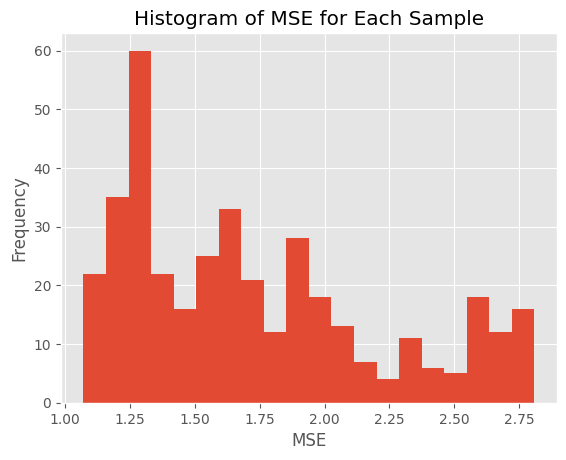

In [90]:
mse_values = calculate_mse_per_sample(pred, true)

pd.Series(mse_values).hist(bins=20)
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Histogram of MSE for Each Sample')
plt.show()


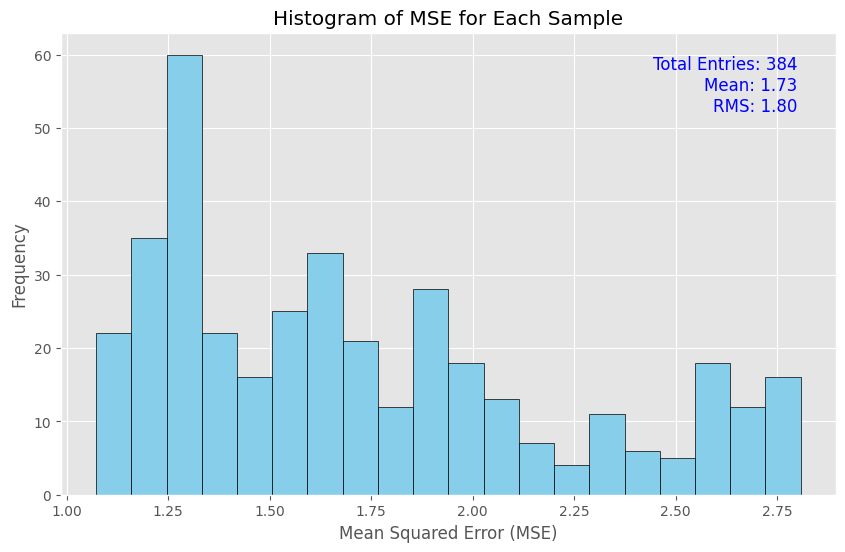

In [92]:
mean_mse = np.mean(mse_values)
rms_mse = np.sqrt(np.mean(np.square(mse_values)))

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
pd.Series(mse_values).hist(bins=20, color='skyblue', edgecolor='black')

# Annotating the plot with mean, RMS, and count
plt.text(0.95, 0.95, f'Total Entries: {len(mse_values)}\nMean: {mean_mse:.2f}\nRMS: {rms_mse:.2f}', 
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, color='blue', fontsize=12)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Histogram of MSE for Each Sample')
plt.grid(True)
plt.show()


In [94]:
np.load('/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_Autoformer_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy')

array([8.7130880e-01, 1.7302086e+00, 1.3153739e+00, 3.2748194e+00,
       3.0038823e+03], dtype=float32)

In [115]:
np.load("/Users/raman/Projects/ExtFormer/results/long_term_forecast_Divvy_96_96_DLinear_Divvy_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0/DLinear_Divvy_Divvy_96_96_static2_metrics.npy")

array([  0.9141842,   2.3811343,   1.5430925,   1.6404996, 316.68332  ],
      dtype=float32)

In [ ]:
original=[0.004, 0.001, 0.0008, 0.0006]
autofe=[0.005, 0.0015, 0.001, 0.01 ]
tsfuse=[0.011, 0.008, 0.012, 0.025]

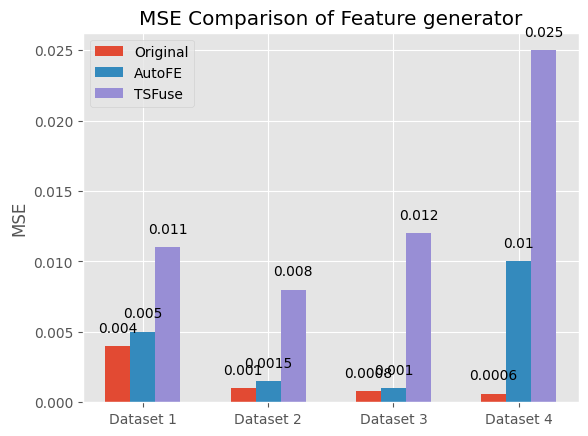

In [118]:
import matplotlib.pyplot as plt

# Data for the models
models = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
original = [0.004, 0.001, 0.0008, 0.0006]
autofe = [0.005, 0.0015, 0.001, 0.01]
tsfuse = [0.011, 0.008, 0.012, 0.025]

x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, original, width, label='Original')
ax.bar([p + width for p in x], autofe, width, label='AutoFE')
ax.bar([p + width * 2 for p in x], tsfuse, width, label='TSFuse')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE Comparison of Feature generator')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(models)
ax.legend()

# Label with the MSE value above each bar
for i in x:
    ax.text(i, original[i] + 0.001, str(original[i]), ha='center')
    ax.text(i + width, autofe[i] + 0.001, str(autofe[i]), ha='center')
    ax.text(i + width * 2, tsfuse[i] + 0.001, str(tsfuse[i]), ha='center')

plt.show()
